# Exercise 2: Simple Calculator
Create a state machine that will sum all values passed if 'operator' is '+'. And multiply all values passed if the 'operator' is '*'. No need for parsing. You may use simple conditional logic.

In [1]:
# Imports
from typing import TypedDict, List
from langgraph.graph import StateGraph
from math import prod

In [2]:
# Define the state
class AgentState(TypedDict):
    values: List[int]
    operator: str
    result: int

In [3]:
# Define node(s)
def process_values(state: AgentState) -> AgentState:
    if state['operator'] == '+':
        state['result'] = sum(state['values'])
    elif state['operator'] == '*':
        state['result'] = prod(state['values'])
    else:
        raise Exception(f"Invalid operator: {state['operator']}")
    return state

In [4]:
# Define the graph, compile it
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

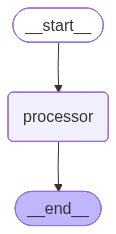

In [6]:
# Visualise the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
# Run the app
values: List[int] = [1, 2, 3, 4]
first_state_sum: AgentState = {
    'operator': '+',
    'values': values
}
first_state_prod: AgentState = {
    'operator': '*',
    'values': values
}
final_state_sum: AgentState = app.invoke(first_state_sum)
final_state_prod: AgentState = app.invoke(first_state_prod)
print(f"When the values {values}")
print(f"are summed, the result is {final_state_sum['result']}")
print(f"are multiplied, the result is {final_state_prod['result']}")

When the values [1, 2, 3, 4]
are summed, the result is 10
are multiplied, the result is 24
